In [3]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Admission_Predict.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "mohansacharya/graduate-admissions",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3-4082657132.py:10: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df.rename(columns={'Chance of Admit ':'Chance of Admit'}, inplace=True)
df.drop('Serial No.', axis=1, inplace=True)

In [6]:
# Set Seaborn style
sns.set(style="whitegrid", palette="muted")

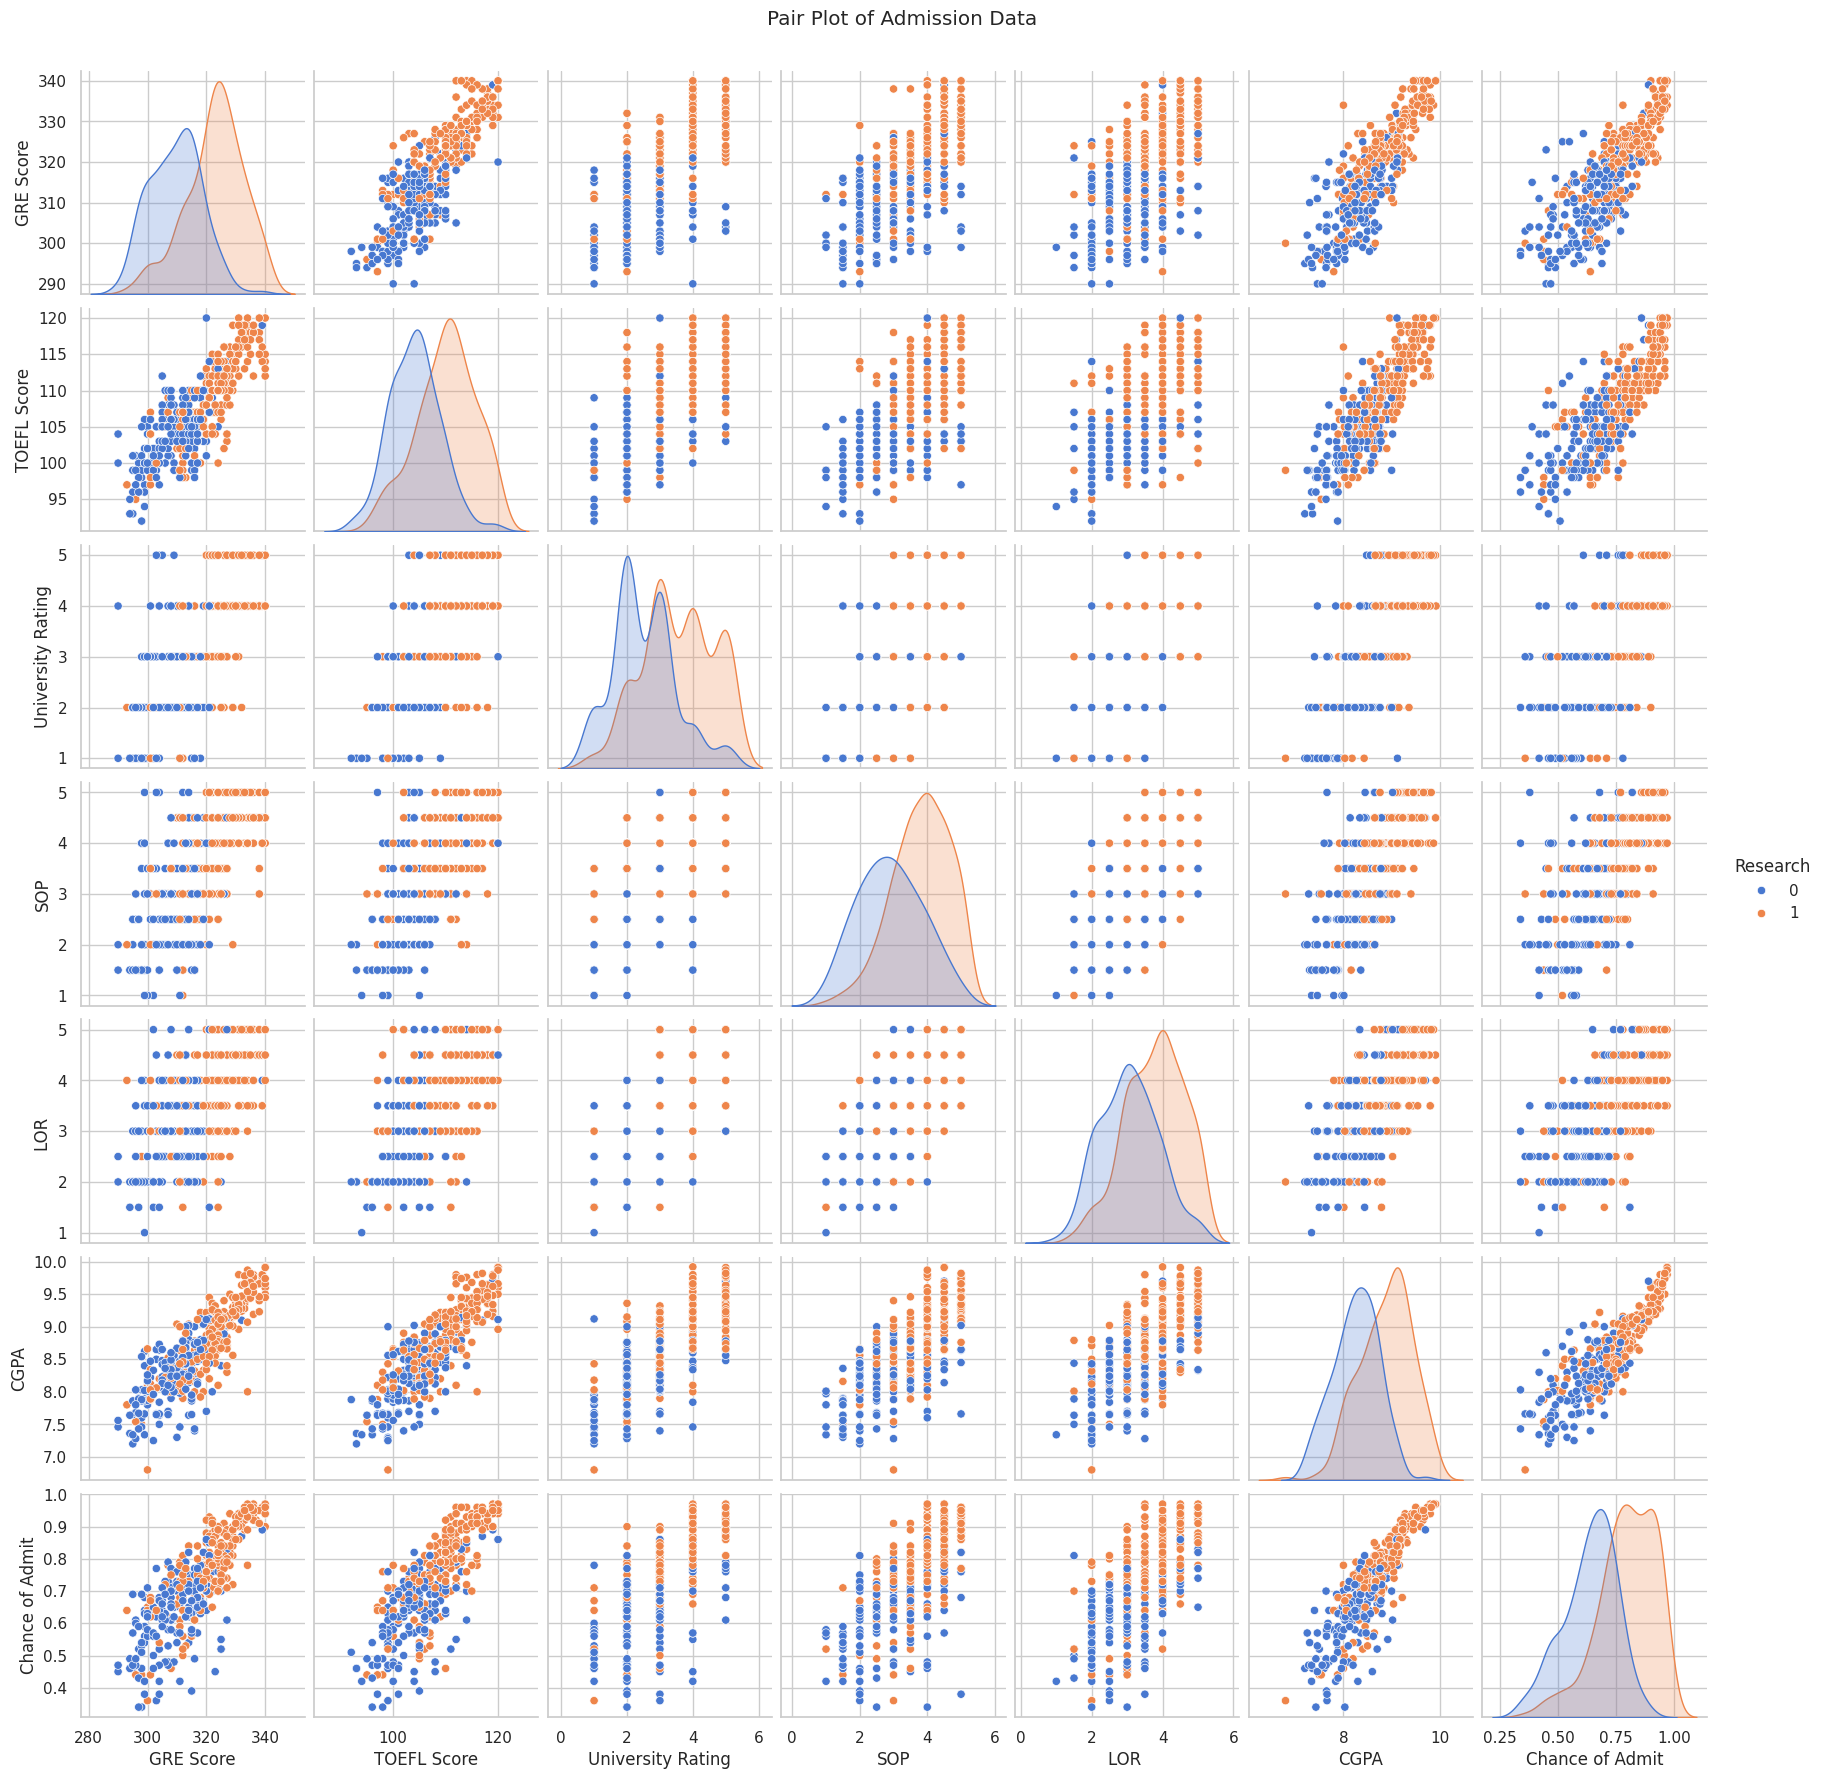

In [7]:
# 1. Pair Plot
sns.pairplot(df, hue="Research")
plt.suptitle("Pair Plot of Admission Data", y=1.02)
plt.show()

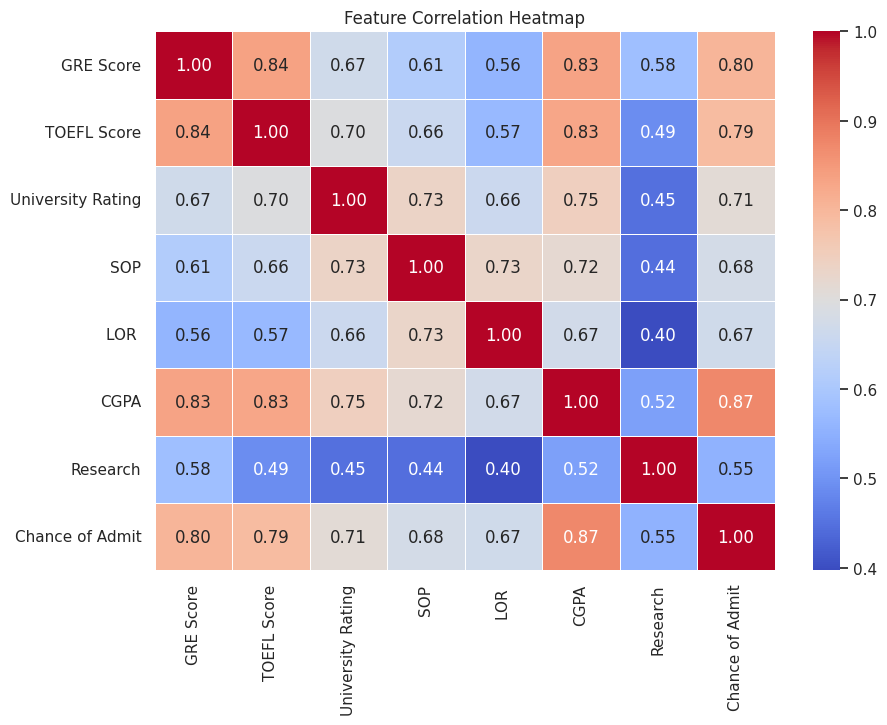

In [8]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

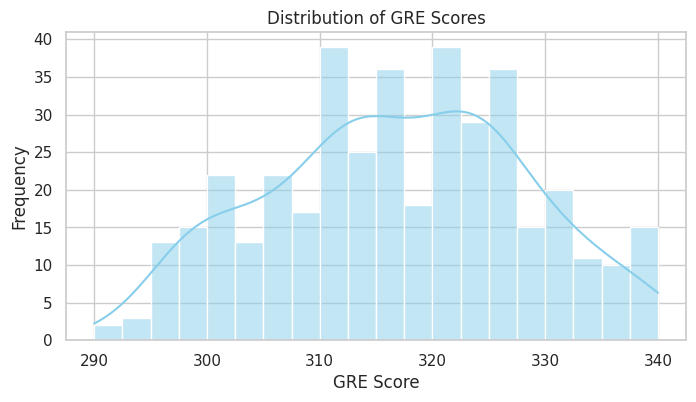

In [9]:
# 3. Distribution of GRE Score
plt.figure(figsize=(8, 4))
sns.histplot(df['GRE Score'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")
plt.show()

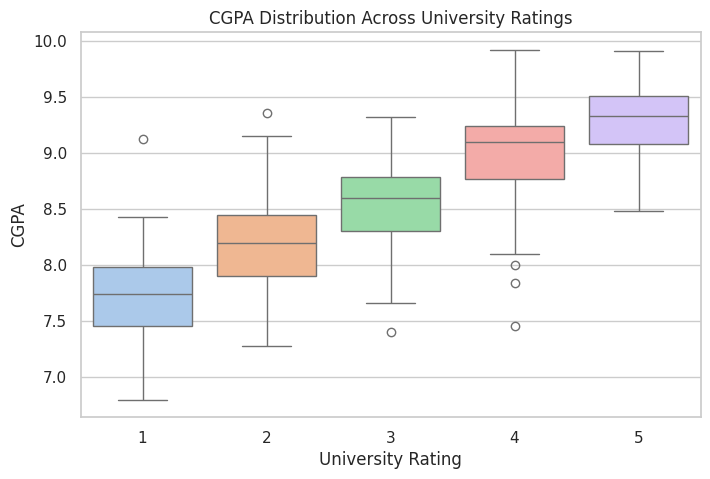

In [12]:
# 4. Box Plot: CGPA vs. University Rating
plt.figure(figsize=(8, 5))
sns.boxplot(x='University Rating', y='CGPA', data=df, palette='pastel', hue='University Rating', legend=False)
plt.title("CGPA Distribution Across University Ratings")
plt.show()

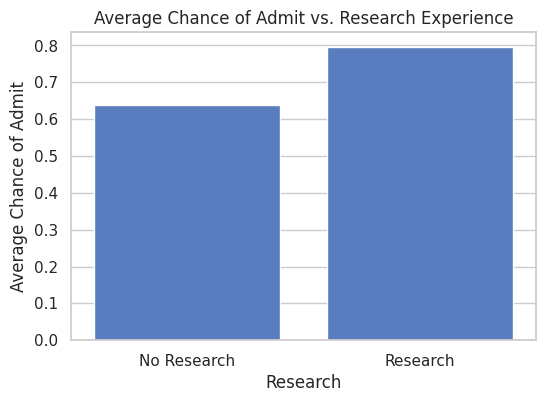

In [17]:
# 5. Bar Plot: Average Chance of Admit by Research
plt.figure(figsize=(6, 4))
sns.barplot(x='Research', y='Chance of Admit', data=df, errorbar=None)
plt.title("Average Chance of Admit vs. Research Experience")
plt.xticks([0, 1], ['No Research', 'Research'])
plt.ylabel("Average Chance of Admit")
plt.show()

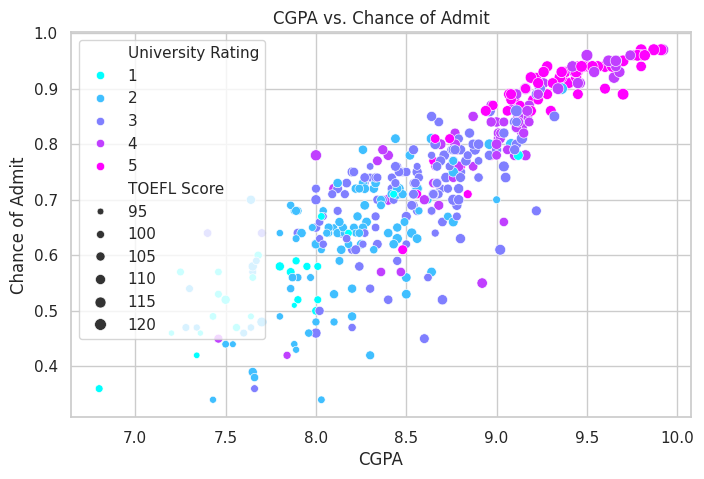

In [18]:
# 6. Scatter Plot: CGPA vs. Chance of Admit
plt.figure(figsize=(8, 5))
sns.scatterplot(x='CGPA', y='Chance of Admit', hue='University Rating', palette='cool', size='TOEFL Score', data=df)
plt.title("CGPA vs. Chance of Admit")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Features and Target
X = df.drop("Chance of Admit", axis=1)
y = df["Chance of Admit"]

In [23]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

In [24]:
# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

In [25]:
# XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

In [26]:
# Evaluation
def evaluate_model(name, y_test, preds):
    print(f"\n{name}")
    print("MSE:", mean_squared_error(y_test, preds))
    print("R² Score:", r2_score(y_test, preds))

evaluate_model("Linear Regression", y_test, lr_preds)
evaluate_model("Random Forest", y_test, rf_preds)
evaluate_model("XGBoost", y_test, xgb_preds)


Linear Regression
MSE: 0.004617003377285005
R² Score: 0.8212082591486993

Random Forest
MSE: 0.004994038499999999
R² Score: 0.8066077140670239

XGBoost
MSE: 0.0051815818923511125
R² Score: 0.7993451658591142
